In [1]:
import subprocess
import time
import matplotlib.pyplot as plt

def run_command(command):
    start_time = time.time()
    subprocess.run(command, shell=True, check=True, capture_output=True, text=True)
    end_time = time.time()
    return end_time - start_time

engines = ["numba", "cuda", "rust"]
image_width = 600
samples_per_pixel = 100
results = {engine: [] for engine in engines}

for engine in engines:
    command = f"uv run one-weekend --engine {engine} --image-width={image_width} --samples-per-pixel={samples_per_pixel}"

    print(f"Running with {engine} engine...")

    try:
        execution_time = run_command(command)
        results[engine].append(execution_time)
        print(f"Finished in {execution_time:.2f} seconds.")
    except subprocess.CalledProcessError as e:
        print(f"Error running with {engine} engine:")
        print(e.stderr)

Running with numba engine...
Finished in 2123.10 seconds.
Running with cuda engine...
Finished in 6.34 seconds.
Running with rust engine...
Finished in 57.41 seconds.


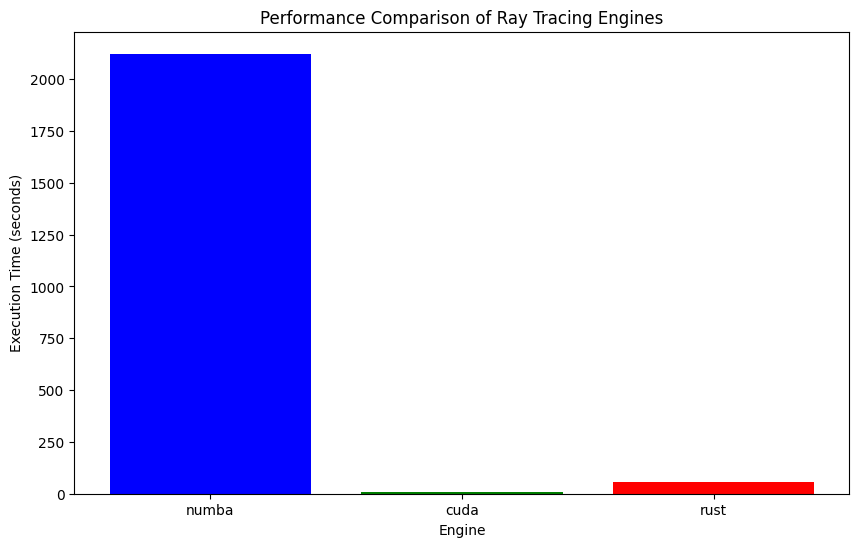

In [2]:
avg_results = {engine: sum(times) / len(times) for engine, times in results.items() if times}

plt.figure(figsize=(10, 6))
plt.bar(avg_results.keys(), avg_results.values(), color=['blue', 'green', 'red'])

plt.title('Performance Comparison of Ray Tracing Engines')
plt.xlabel('Engine')
plt.ylabel('Execution Time (seconds)')
plt.savefig('assets/performance.png')
plt.show()